# Using CNNs to classify Drum samples

## Importing relevant libraries

In [2]:
#basics
import os
from path import Path
from tqdm import tqdm
import numpy as np
import pandas as pd
#feature extraction
import librosa
import librosa.display
import librosa.feature
#preProcessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
#data visualization
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#model building
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#evaluation metrics
from sklearn.metrics import confusion_matrix


## Data Preprocessing

### Preprocessing data



1.   Import all audio from github repo
2.   Use function to add padding or trim audio files to ensure uniform length
3. Use function to extract features (MFCCs), plot as heatmap and save output



In [3]:
! git clone https://github.com/aahmed96/Drum_Classification.git

Cloning into 'Drum_Classification'...
remote: Enumerating objects: 7453, done.
remote: Total 7453 (delta 0), reused 0 (delta 0), pack-reused 7453
Receiving objects: 100% (7453/7453), 463.94 MiB | 30.96 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (14883/14883), done.


In [ ]:
#function to trim or add audio samples
def trim_padding(path):
  max_length = 44100 #2 second samples with sr as 22050
  file_names = os.listdir(path)
  X = []
  for file in range(len(file_names)):
    file_path = os.path.join(path,file_names[file])
    y,sr = librosa.load(file_path)
    if len(y) > max_length:
      y = y[0:0+max_length]
    else:
      padding = max_length - len(y)
      y = np.pad(y,(0,padding),'constant')
    
    X.append(y)
  
  return X

In [42]:
def convert_wav_jpg(wav,name,output_dir):
  plt.interactive(False)
  y,sr = librosa.load(wav)
  max_length = 44100 #2 second samples with sr as 22050

  fig = plt.figure(figsize=[2,2])
  ax = fig.add_subplot(111)
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_frame_on(False)

  if len(y) > max_length:
    y=y[0:0+max_length]
  elif len(y) < max_length:
    padding = max_length - len(y)
    y = np.pad(y,(0,padding),'constant')
  
  mfcc = librosa.feature.mfcc(y,sr,n_mfcc=13)
  librosa.display.specshow(mfcc)
  filename = Path(output_dir+name+'.jpg')
  plt.savefig(filename,dpi=400,bbox_inches='tight',pad_inches=0)
  plt.close
  fig.clf()
  plt.close(fig)
  plt.close('all')
  

**Setting working directories**

In [46]:
#toms
toms_input_dir = '/content/Drum_Classification/data/TOMS'
toms_output_dir = '/content/Drum_Classification/data_images/toms/'
toms_names = os.listdir(toms_input_dir)


#snares
snares_output_dir = '/content/Drum_Classification/data_images/snares/'
snares_input_dir = '/content/Drum_Classification/data/SNARES'
snares_names = os.listdir(snares_input_dir)

#percussion
percussion_input_dir = '/content/Drum_Classification/data/PERCUSSION'
percussion_output_dir = '/content/Drum_Classification/data_images/percussion/'
percussion_names = os.listdir(percussion_input_dir)

#kicks
kicks_input_dir = '/content/Drum_Classification/data/KICKS'
kicks_output_dir = '/content/Drum_Classification/data_images/kicks/'
kicks_names = os.listdir(kicks_input_dir)

#hihats
hihats_input_dir = '/content/Drum_Classification/data/HIHATS'
hihats_output_dir = '/content/Drum_Classification/data_images/hihats/'
hihats_names = os.listdir(hihats_input_dir)

#crashes
crashes_input_dir = '/content/Drum_Classification/data/CRASHES'
crashes_output_dir = '/content/Drum_Classification/data_images/crashes/'
crashes_names = os.listdir(crashes_input_dir)

#claps
claps_input_dir = '/content/Drum_Classification/data/CLAPS'
claps_output_dir = '/content/Drum_Classification/data_images/claps/'
claps_names = os.listdir(claps_input_dir)

In [61]:
#creating images
#here I replace the class names and re-run the cell to generate images for each class

for file in range(len(percussion_names)):
  file_name = percussion_names[file]
  if file_name =='.DS_Store':
    print('Error')
  else:
    name = file_name.split(sep='.')[0]
    audio_file = os.path.join(percussion_input_dir,file_name)
    convert_wav_jpg(audio_file,name,percussion_output_dir)

Error


**Download all images as a zip file**

In [62]:
from google.colab import files
import shutil
folder_name = '/content/Drum_Classification/data_images'

shutil.make_archive(folder_name, 'zip', folder_name)


'/content/Drum_Classification/data_images.zip'

In [ ]:
#splitting folders
#used this function locally to create folders and pushed that repo to origin
splitfolders.ratio('data',output='split',seed=1337,ratio=(0.8,0.1,0.1))

## Training the model

In [2]:
#clone repo again to have the split training, testing and validation folder
! git clone https://github.com/aahmed96/Drum_Classification.git

Cloning into 'Drum_Classification'...
remote: Enumerating objects: 14903, done.
remote: Total 14903 (delta 0), reused 0 (delta 0), pack-reused 14903
Receiving objects: 100% (14903/14903), 519.14 MiB | 32.63 MiB/s, done.
Resolving deltas: 100% (377/377), done.
Checking out files: 100% (22324/22324), done.


In [3]:
#setting directories
main_dir = '/content/Drum_Classification/split'

train_path = os.path.join(main_dir,'train')
test_path = os.path.join(main_dir,'test')
val_path = os.path.join(main_dir,'val')


In [117]:
#setting class directories 
target_folders = os.listdir(test_path)[0:7]

file_paths = []

for i in range(len(target_folders)):
  target_path = os.path.join(test_path,target_folders[i])
  files = os.listdir(target_path)[0:5]
  for file in files:
    file_path = os.path.join(target_path,file)
    file_paths.append(file_path)

print(file_paths)

[]
[]
['/content/Drum_Classification/split/test/snares/VEH3 Snares 109.jpg', '/content/Drum_Classification/split/test/snares/DPHE Snare - 104.jpg', '/content/Drum_Classification/split/test/snares/VEH3 Snares 027.jpg', '/content/Drum_Classification/split/test/snares/VEE2 Snare 008.jpg', '/content/Drum_Classification/split/test/snares/VES1 Snare 138.jpg', '/content/Drum_Classification/split/test/percussion/VES1 Percussion 255.jpg', '/content/Drum_Classification/split/test/percussion/VES1 Percussion 103.jpg', '/content/Drum_Classification/split/test/percussion/VMH1 Minimal Perc 345.jpg', '/content/Drum_Classification/split/test/percussion/VEE Percussion 145.jpg', '/content/Drum_Classification/split/test/percussion/VMH1 Minimal Perc 148.jpg', '/content/Drum_Classification/split/test/toms/DPHE Tom - 028.jpg', '/content/Drum_Classification/split/test/toms/VEH1 Tom - 16.jpg', '/content/Drum_Classification/split/test/toms/DPHE Tom - 147.jpg', '/content/Drum_Classification/split/test/toms/DPHE 

### Data visualization

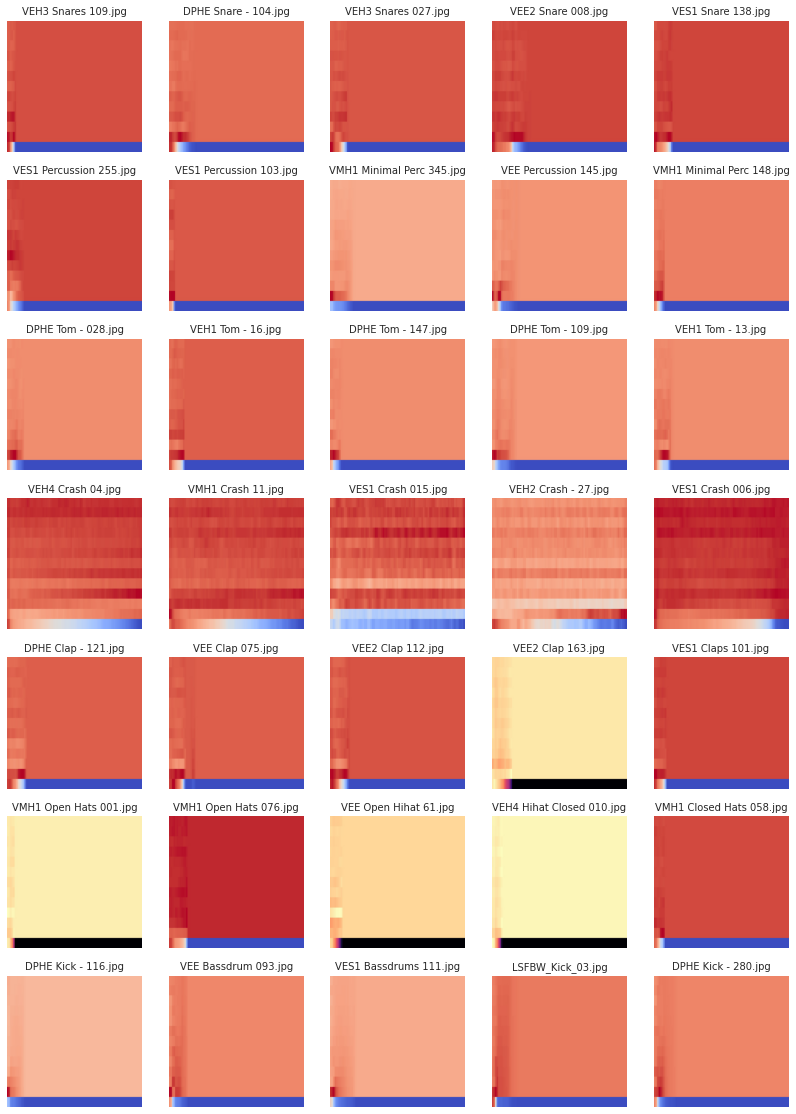

In [127]:
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 7
cols = 5
#set the figure size
fig = plt.gcf()
fig.set_size_inches(14,20)
#get the filenames from the covid & normal dir of the train dataset

#merge the covid and normal list

for i, img_path in enumerate(file_paths):
  name = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(name,fontsize=10)
  plt.imshow(img,cmap='gray')
plt.savefig('Spectograms',dpi=600,bbox_inches='tight',pad_inches=0)
plt.show()

### Data generators

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #image augmentation
from keras import optimizers


In [47]:
train_gen = ImageDataGenerator(
    rescale= 1./255
)
test_gen = ImageDataGenerator(
    rescale= 1./255
)
val_gen = ImageDataGenerator(
    rescale= 1./255
)

train_generator = train_gen.flow_from_directory(
    train_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

validation_generator = train_gen.flow_from_directory(
    val_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(150,150),
    shuffle = False,
    class_mode = 'categorical'
)

Found 5947 images belonging to 7 classes.
Found 741 images belonging to 7 classes.
Found 750 images belonging to 7 classes.


In [6]:
train_generator.class_indices

{'claps': 0,
 'crashes': 1,
 'hihats': 2,
 'kicks': 3,
 'percussion': 4,
 'snares': 5,
 'toms': 6}

In [8]:
input_shape = train_generator.image_shape
print(input_shape)

(150, 150, 3)


**Old model we used**

In [22]:
#old model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer=optimizers.RMSprop(learning_rate=0.0005,decay=1e-6),
     metrics=['acc'])

**Final model**

In [25]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               23040128  
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)              

In [27]:
#train the model
history = model.fit(train_generator,
                    epochs = 100,
                    validation_data=validation_generator)

Epoch 1/100
186/186 [==============================] - 30s 160ms/step - loss: 2.3936 - acc: 0.2981 - val_loss: 1.1766 - val_acc: 0.5493
Epoch 2/100
186/186 [==============================] - 29s 158ms/step - loss: 1.3179 - acc: 0.4646 - val_loss: 1.0274 - val_acc: 0.5749
Epoch 3/100
186/186 [==============================] - 29s 158ms/step - loss: 1.1798 - acc: 0.5412 - val_loss: 1.0059 - val_acc: 0.5830
Epoch 4/100
186/186 [==============================] - 29s 158ms/step - loss: 1.1413 - acc: 0.5502 - val_loss: 0.8365 - val_acc: 0.6613
Epoch 5/100
186/186 [==============================] - 29s 158ms/step - loss: 1.0484 - acc: 0.5937 - val_loss: 0.7948 - val_acc: 0.6829
Epoch 6/100
186/186 [==============================] - 29s 158ms/step - loss: 0.9819 - acc: 0.6081 - val_loss: 0.7859 - val_acc: 0.7436
Epoch 7/100
186/186 [==============================] - 29s 158ms/step - loss: 0.9456 - acc: 0.6229 - val_loss: 0.8285 - val_acc: 0.7085
Epoch 8/100
186/186 [===========================

## Testing the model

In [30]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

24/24 [==============================] - 3s 126ms/step - loss: 0.4993 - acc: 0.8387
test loss:0.4992971122264862 test acc:0.8386666774749756


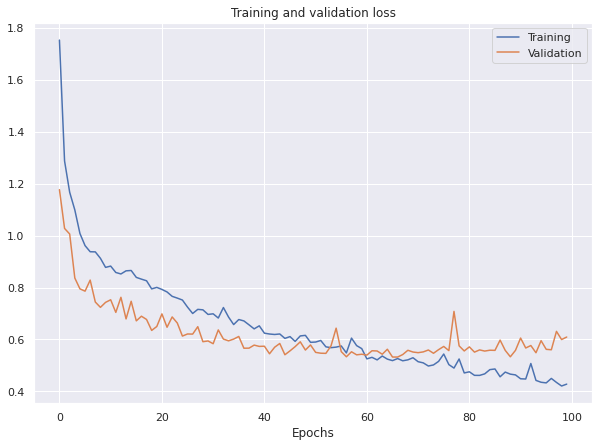

In [103]:
#plot graph between training and validation loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.savefig('Loss',dpi=600)
plt.show()

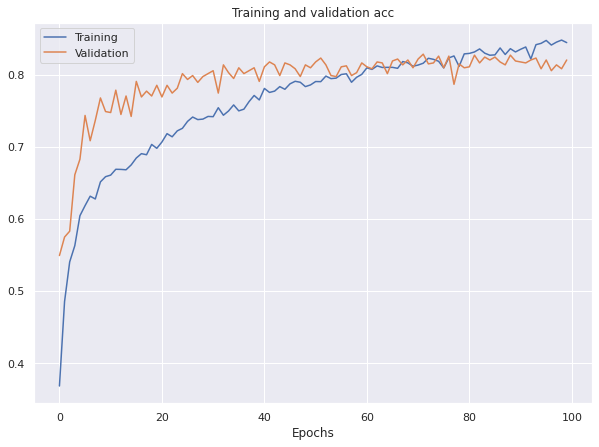

In [105]:
#plot graph between training and validation loss
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.savefig('Accuracy',dpi=600)
plt.show()

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [53]:
Y_pred = model.predict_classes(test_generator)
print(y_pred)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 5
 5 5 0 0 0 5 0 0 5 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5 0 5 0 0 0 0 0 0 0 0 0
 5 5 0 0 0 5 0 0 0 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 5 0 0 5 0 0 0 0 0 0 4 0 5
 0 0 0 0 0 5 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4
 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 0 4 4 2 2 4 4 0 4 2 4 4 

In [96]:
#confusion matrix
cm = confusion_matrix(test_generator.classes, Y_pred,labels=[0,1,2,3,4,5,6],normalize='true')

target_names = ['claps', 'crashes', 'hihats', 'kicks', 'percussion', 'snares', 'toms']
print('Confusion Matrix')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
              precision    recall  f1-score   support

       claps       0.82      0.83      0.83       121
     crashes       1.00      1.00      1.00        24
      hihats       0.92      0.97      0.95       147
       kicks       0.94      0.96      0.95       168
  percussion       0.78      0.77      0.77       150
      snares       0.83      0.89      0.86       120
        toms       0.00      0.00      0.00        20

    accuracy                           0.87       750
   macro avg       0.76      0.77      0.77       750
weighted avg       0.84      0.87      0.86       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print(test_generator.class_indices)
labels = test_generator.class_indices.keys()
labels = np.asarray(labels)
print(labels)

{'claps': 0, 'crashes': 1, 'hihats': 2, 'kicks': 3, 'percussion': 4, 'snares': 5, 'toms': 6}
dict_keys(['claps', 'crashes', 'hihats', 'kicks', 'percussion', 'snares', 'toms'])


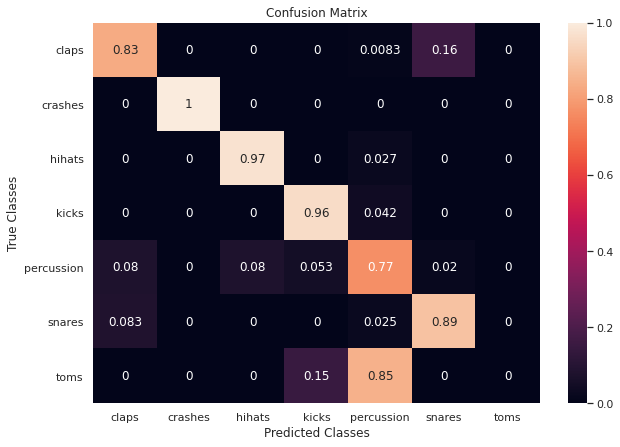

In [100]:
df_cm = pd.DataFrame(cm, index=['claps', 'crashes', 'hihats', 'kicks', 'percussion', 'snares', 'toms'],
                     columns=['claps', 'crashes', 'hihats', 'kicks', 'percussion', 'snares', 'toms'])
plt.figure(figsize=(10,7))
sn.set(font_scale=1.0) # for label size

ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 12}) # font size
ax.set(xlabel='Predicted Classes',ylabel='True Classes',title='Confusion Matrix')
#sn.heatmap()
plt.savefig('Confusion Matrix',dpi=600)
plt.show()